**Install Sklearn: **

In [1]:
%%bash
pip install scikit-learn

To import all pakages: 

In [2]:
import numpy as np # Array Pakages
import pandas as pd # read in cvs 
import matplotlib.pyplot as plt # graphing tool
from sklearn.model_selection import train_test_split # Sklearn Pakage for machine learning 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import time

Import data and set trainning and testing varaibles: 

In [3]:
# did not run all data due to time limit
sample = 3000 
# get data set 
def LoadData(sample):
    train = pd.read_csv('../input/train.csv')
    test = pd.read_csv('../input/test.csv')
    # x: pixcels
    pixcels_train = train.values[: sample, 1:]
    # y : label is training set's user drawn number, what number are the pixels represents 
    label_train = train.values[: sample, 0]
    pixcels_test = test.values
    return pixcels_train, label_train, pixcels_test

Origin_pixcels_train, Origin_label_train, Origin_pixcels_test = LoadData(sample)
print(Origin_pixcels_train.shape, Origin_label_train.shape, Origin_pixcels_test.shape)


(3000, 784) (3000,) (28000, 784)


To test and confim we get the pic 

Row represents row number in excel sheet: 
1. Origin_label_train[row] represents which number from 0-9 we are looking at
2. Origin_pixcels_train[row] represents the number's pixcels, which can be drawn as a graph 

6
[1 0 1 ... 3 2 3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 191 255  64   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  64 255 255 255 255  64   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64
 255 255 255 255 255 255  64   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  64 191 255 255 255 255 255 255 128   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64
 255 255 255 255 255 255 255 191  64   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  64 255 255 255 255 255 255 255 255  64
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 128
 255 255 255 255 255 255 255 19

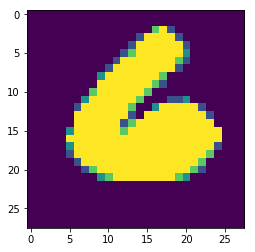

In [4]:
row = 500
print(Origin_label_train[row])
print(Origin_label_train)
print(Origin_pixcels_train[row])
plt.imshow(Origin_pixcels_train[row].reshape((28,28)))
plt.show()

**Get random sample for each number**

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


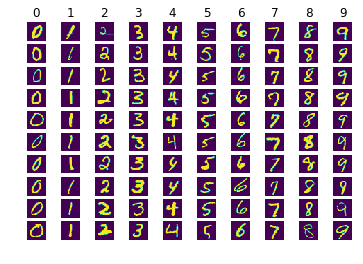

In [5]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 10

print(classes)
# for loop every number 
for y, cls in enumerate(classes):
    # nonzero function return index of elements that are non zero
    # get rid of all 0s that in csv file, so that we are working on solid number represneted data files   
    
    # idxs includes all sampes index in train cvs for each classses number 
    idxs = np.nonzero([i == y for i in Origin_label_train])
    # row : pick 4 sample for each number
    idxs = np.random.choice(idxs[0], rows) 

    for i , idx in enumerate(idxs):
        #plt_idx locate position of the pic 
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        # print each cls's each sample at plt_idx position 
        plt.imshow(Origin_pixcels_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
    
plt.show()

Split the training data and testing data: 

In [6]:
# split the clase to 30% and 70%
X_train, X_tesing, y_train, y_testing = train_test_split(Origin_pixcels_train, Origin_label_train, test_size = 0.3, random_state = 1)
print("split the cases to:")
print(X_train.shape, y_train.shape, X_tesing.shape, y_testing.shape)

split the cases to:
(2100, 784) (2100,) (900, 784) (900,)


Training with KNN Model: 

In [7]:
# k range defined how many neighbor we would like to consider
k_range = range(1, 20)
scores = []

for k in k_range:
    print('k = ', k, 'begin:')
    start = time.time()
    #Create KNN Classifier
    KNN = KNeighborsClassifier(k)
    #Train the model using the training sets
    KNN.fit(X_train, y_train)
    prediction = KNN.predict(X_tesing)
    # get the accuracy scores: 
    accuracy = accuracy_score(y_testing, prediction)
    scores.append(accuracy)
    end = time.time()
    # create report: 
    print(classification_report(y_testing, prediction))
    print(confusion_matrix(y_testing, prediction))
    print('completion time = ', end-start, 'seconds')





k =  1 begin:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        96
           1       0.94      1.00      0.97       106
           2       0.99      0.87      0.92        99
           3       0.86      0.92      0.89        75
           4       0.91      0.87      0.89        82
           5       0.94      0.86      0.89        84
           6       0.94      0.99      0.97        85
           7       0.88      0.94      0.91       107
           8       0.92      0.83      0.87        82
           9       0.81      0.86      0.83        84

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.92      0.91      0.91       900

[[ 93   0   0   0   0   1   2   0   0   0]
 [  0 106   0   0   0   0   0   0   0   0]
 [  2   2  86   1   1   0   1   5   1   0]
 [  0   1   1  69   1   0   0   2   1   0]
 [  0   0   0   0  71   0   0   0   0  11]
 [  0   1   

Plot the accuracy: 

The graph shows that as we include more neighbor, the accuracy decreases

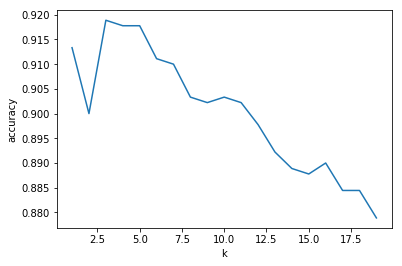

In [8]:
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

As we can see above, including 3 neighbor produce the highest accuracy, so we set our k as 3: 

In [9]:
k = 3
knn = KNeighborsClassifier(k)
knn.fit(X_train, y_train)
# selection all original testing cases and predict the final result, due to time limit, we select 500 cases:
myPrediction = knn.predict(Origin_pixcels_test[:500])
print(myPrediction)

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 7 7 7 5 4 2 6 2 9
 5 1 6 7 7 4 9 8 7 8 2 6 1 6 8 8 3 8 2 1 2 1 0 9 1 7 0 0 0 1 9 0 1 6 5 8 8
 2 8 3 9 2 3 5 9 1 0 9 2 4 3 6 7 2 0 6 6 1 4 3 4 7 4 0 8 2 0 7 3 0 5 0 9 0
 0 4 7 1 7 1 1 3 3 3 7 2 8 6 3 8 7 1 9 3 5 6 0 0 0 3 1 5 6 5 3 4 5 5 8 7 7
 2 8 4 3 5 6 5 1 7 5 7 8 3 0 4 5 1 2 7 6 3 0 2 7 9 6 1 3 7 4 1 2 9 8 5 2 4
 9 2 1 6 0 6 1 4 9 6 0 9 7 6 9 1 9 0 9 9 0 8 4 6 2 0 9 3 6 7 2 1 6 3 4 2 3
 1 0 2 0 4 6 1 0 0 6 9 1 7 3 2 8 8 6 8 6 2 3 5 5 9 8 3 4 9 7 1 3 8 4 5 1 4
 3 6 3 3 5 7 0 6 8 3 1 6 0 6 3 9 3 1 5 8 4 0 5 2 0 5 3 7 1 9 9 5 7 7 9 9 6
 3 0 3 3 6 9 8 2 6 2 7 1 4 5 8 5 9 0 0 3 8 4 1 8 4 1 1 9 8 4 5 1 5 3 6 3 1
 3 0 9 0 0 6 0 6 0 1 8 6 0 6 5 2 8 6 7 7 2 5 8 8 9 2 1 8 6 3 5 4 2 3 8 1 6
 4 0 9 9 7 6 9 5 3 7 6 5 5 4 2 6 1 1 3 7 1 7 9 9 6 1 1 1 7 3 9 7 6 1 1 1 4
 3 8 5 5 0 4 1 2 3 1 1 3 5 9 6 6 5 3 1 4 7 7 7 4 8 5 2 6 1 3 9 5 0 8 4 7 4
 6 4 1 5 3 9 5 7 6 9 5 9 2 3 1 6 1 7 5 0 5 1 7 4 4 1 1 4 9 5 6 0 1 3 1 0 4
 8 1 2 7 9 4 8 3 7 7 4 2 

Tesing example: 
    We can randomly select one of the prediction and compare the given result with its coresponding handwriting picture:

3


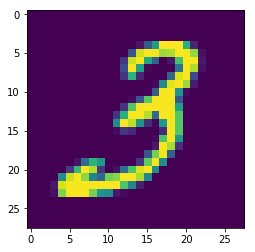

In [10]:
# example is a random sample we choose to test the result: 
i = 221
print(myPrediction[i])
plt.imshow(Origin_pixcels_test[i].reshape((28,28)))
plt.show()